# 1 Sleep well

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import zero_one_loss
from sklearn.ensemble import RandomForestClassifier
from sklearn.exceptions import ConvergenceWarning
from sklearn.utils._testing import ignore_warnings
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

1.1 Data understanding and preprocessing

In [19]:
# Load the training data
X_train = np.loadtxt('X_train.csv', delimiter=',')
y_train = np.loadtxt('y_train.csv', delimiter=',')
X_test = np.loadtxt('X_test.csv', delimiter=',')
y_test = np.loadtxt('y_test.csv', delimiter=',')

# Report the class frequencies
print('Class frequencies:')
for i in range(5):
    print('Class %d: %f' % (i, np.sum(y_train == i) / y_train.shape[0]))

Class frequencies:
Class 0: 0.520875
Class 1: 0.095511
Class 2: 0.252728
Class 3: 0.046940
Class 4: 0.083946


Plot

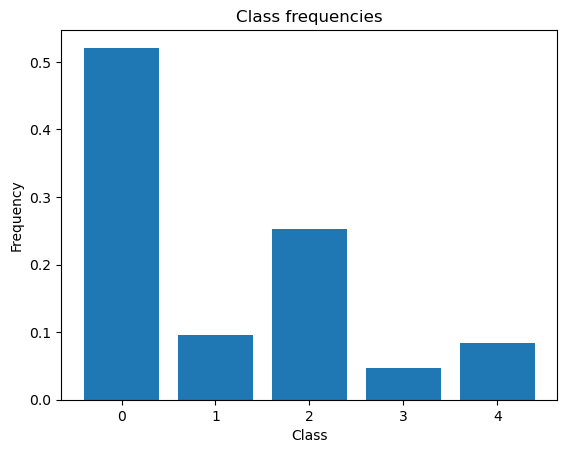

In [15]:
# Plot class frequencies (bar plot)
plt.bar(np.arange(5), [np.sum(y_train == i) / y_train.shape[0] for i in range(5)])
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Class frequencies')
plt.show()

### 1.2 Classification

1.2.1 Multinomial Logistic Regression

In [18]:
# Split the training data into training and validation data (80/20 split)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

# Train softmax regression model
with ignore_warnings(category=ConvergenceWarning):
    softmax_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', n_jobs=-1)
    softmax_model.fit(X_train, y_train)

# Make predictions on the validation data
y_pred = softmax_model.predict(X_val)

# Report the zero-one loss
print('Zero-one loss training (softmax): %f' % zero_one_loss(y_val, y_pred))

# Predict on test data
y_pred_test = softmax_model.predict(X_test)

# Report the zero-one loss
print('Zero-one loss on test data (softmax): %f' % zero_one_loss(y_test, y_pred_test))

Zero-one loss training (softmax): 0.146182
Zero-one loss on test data (softmax): 0.098842


1.2.2 Random Forest

In [22]:
# Apply random forests with 50, 100, and 200 trees.
for n_estimators in [50, 100, 200]:
    # Train random forest classifier
    rf_model = RandomForestClassifier(n_estimators=n_estimators, random_state=0, n_jobs=-1)
    rf_model.fit(X_train, y_train)

    # Make predictions on the training data
    y_pred_train = rf_model.predict(X_val)

    # Report the zero-one loss
    print('Zero-one loss on training data with %d trees: %f' % (n_estimators, zero_one_loss(y_val, y_pred_train)))

    # Make predictions on the test data
    y_pred_test = rf_model.predict(X_test)

    # Report the zero-one loss
    print('Zero-one loss on test data with %d trees: %f' % (n_estimators, zero_one_loss(y_test, y_pred_test)))

Zero-one loss on training data with 50 trees: 0.143662
Zero-one loss on test data with 50 trees: 0.112798
Zero-one loss on training data with 100 trees: 0.141142
Zero-one loss on test data with 100 trees: 0.110424
Zero-one loss on training data with 200 trees: 0.141586
Zero-one loss on test data with 200 trees: 0.110424


1.2.3 K-NN

Without scaling

In [5]:
# Load the data again
X_train = np.loadtxt('X_train.csv', delimiter=',')
y_train = np.loadtxt('y_train.csv', delimiter=',')
X_test = np.loadtxt('X_test.csv', delimiter=',')
y_test = np.loadtxt('y_test.csv', delimiter=',')

# Define the parameter grid
param_grid = {'n_neighbors': np.arange(1, 500)}

# Define the grid search
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform the grid search
grid.fit(X_train, y_train)

# Print the optimal number of neighbors and the corresponding score
print('Optimal number of neighbors: %d' % grid.best_params_['n_neighbors'])

# Print the zero-one loss on the training data using the optimal number of neighbors
print('Zero-one loss on training data with optimal number of %d neighbors: %f' % (grid.best_params_['n_neighbors'], zero_one_loss(y_train, grid.predict(X_train))))

Optimal number of neighbors: 173
Zero-one loss on training data with optimal number of 173 neighbors: 0.150071


In [36]:
# Print the zero-one loss on the test data using the optimal number of neighbors
y_pred_test = grid.predict(X_test)

# Report the zero-one loss
print('Zero-one loss on test data with %d neighbors: %f' % (grid.best_params_['n_neighbors'], zero_one_loss(y_test, y_pred_test)))

Zero-one loss on test data with 173 neighbors: 0.095533


With scaling

In [4]:
# Load the data again
X_train = np.loadtxt('X_train.csv', delimiter=',')
y_train = np.loadtxt('y_train.csv', delimiter=',')
X_test = np.loadtxt('X_test.csv', delimiter=',')
y_test = np.loadtxt('y_test.csv', delimiter=',')

# Use min-max scaling to scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Define the parameter grid
param_grid = {'n_neighbors': np.arange(1, 500)}

# Define the grid search
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform the grid search
grid.fit(X_train, y_train)

# Print the optimal number of neighbors and the corresponding score
print('Optimal number of neighbors: %d' % grid.best_params_['n_neighbors'])

# Print the zero-one loss on the training data using the optimal number of neighbors
print('Zero-one loss on training data with optimal number of %d neighbors: %f' % (grid.best_params_['n_neighbors'], zero_one_loss(y_train, grid.predict(X_train))))

Optimal number of neighbors: 155
Zero-one loss on training data with optimal number of 155 neighbors: 0.149804


In [34]:
# Print the zero-one loss on the test data using the optimal number of neighbors
y_pred_test = grid.predict(X_test)

# Report the zero-one loss
print('Zero-one loss on test data with %d neighbors: %f' % (grid.best_params_['n_neighbors'], zero_one_loss(y_test, y_pred_test)))

Zero-one loss on test data with 155 neighbors: 0.096396
